## Task8) Design a VGG16 model similar to what you already implemented in the lab 2 task7a. Please note the model should contain 3 dense layers at the top each of which contain 64 neurons as well as dropout layer (rate=0.4). Finally, a dense layer with 2 neurons at the last layer so that the activation function should be set as “softmax” and categorical cross entropy as loss function. (Remember to name the last convolutional layer as = 'Last_ConvLayer') [model.add(Conv2D(filters=Base*8, kernel_size=(3,3), strides=(1,1), padding='same', name = 'Last_ConvLayer'))] Train the model with data augmentation techniques with parameters as : base=8; batch_s = 8; LR=1e-5; img_size = 128*128, epoch = 80. After the training process, follow the implementation below and interpret the observed results. What can you infer from visualization of the class activation maps?

In [6]:
# Data Loader
%autosave 60

import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras import backend as K
import cv2

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPooling2D, BatchNormalization,\
                                    SpatialDropout2D
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

import matplotlib.pyplot as plt

Autosaving every 60 seconds


In [7]:

# 2) set the directory to the data and model parameters like:
train_dir = '/DL_course_data/Lab2/Bone/train/'
val_dir = '/DL_course_data/Lab2/Bone/validation/' 

img_width = 128
img_height = 128
img_ch = 1

batch_size = 8
learning_rate = 0.00001
base = 64
dropout_rate = 0.4
epochs=80
rescale = 1./255



# 4)Set train data generator like:
train_datagen = ImageDataGenerator(rescale=rescale)
# 5)Compile the train generator over the training directory:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    color_mode='grayscale',
                                                    classes=['AFF', 'NFF'],
                                                    class_mode='categorical',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    )

# 6)Set and compile the validation generator like:
val_datagen = ImageDataGenerator(rescale=rescale)
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_width, img_height),
                                                color_mode='grayscale',
                                                classes=['AFF', 'NFF'],
                                                class_mode='categorical',
                                                batch_size=batch_size,
                                                shuffle=False,
                                               ) 

Found 1112 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [8]:
# define function for visualization of learning curves:
def learning_curves(hist_name, loss_key, validation_loss_key, accuracy_key, validation_accuracy_key):
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(hist_name.history[loss_key], label=loss_key) #loss is training loss
    plt.plot(hist_name.history[validation_loss_key], label=validation_loss_key) #val_loss is validation loss
    plt.plot(np.argmin(hist_name.history[validation_loss_key]),
    np.min(hist_name.history[validation_loss_key]), marker="x", color="r", label="best model")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.ylim((0,3))

    plt.legend();
    print(hist_name.history.keys())
    print("Training accuracy", hist_name.history[accuracy_key][-1])
    print("Validation accuracy", hist_name.history[validation_accuracy_key][-1])
    plt.show()

    # plotting accuracy curves
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(hist_name.history[accuracy_key], label=accuracy_key) # training accuracy
    plt.plot(hist_name.history[validation_accuracy_key], label=validation_accuracy_key) # validation accuracy
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim((0,1))
    return 


In [9]:
# implementation of the VGG16 
tf.compat.v1.disable_eager_execution()
# defining the model based on the previous experiments, so batch_size = 4, n_base=8, LR=1e-05
def VGG16(img_ch, img_width, img_height, n_base):
    
    model = Sequential()
    
    model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(filters=2*n_base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=2*n_base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))    
    
    
    model.add(Conv2D(filters=4*n_base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=4*n_base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=4*n_base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(filters=8*n_base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=8*n_base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=8*n_base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))  

    
    model.add(Conv2D(filters=8*n_base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=8*n_base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=8*n_base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same', name = 'Last_ConvLayer'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2))) 
    

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))

    model.add(Dense(2))
    model.add(Activation('softmax'))

    model.summary()   
    return model

In [10]:
clf = VGG16(1, 128, 128, base)
clf.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()])
clf_hist = clf.fit(train_generator,
                          validation_data=val_generator,
                          epochs=epochs,
                          batch_size=batch_size,
                          verbose=1,
                          shuffle=False
                         ) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
activation_16 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
activation_17 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
activation_18 (Activation)   (None, 64, 64, 128)      

139/139 [==============================] - 68s 492ms/step - loss: 0.0276 - categorical_accuracy: 0.9901 - val_loss: 0.0530 - val_categorical_accuracy: 0.9792
Epoch 17/80
139/139 [==============================] - 69s 494ms/step - loss: 0.0221 - categorical_accuracy: 0.9928 - val_loss: 0.1503 - val_categorical_accuracy: 0.9688
Epoch 18/80
139/139 [==============================] - 69s 495ms/step - loss: 0.0268 - categorical_accuracy: 0.9919 - val_loss: 0.0733 - val_categorical_accuracy: 0.9688
Epoch 19/80
139/139 [==============================] - 69s 493ms/step - loss: 0.0438 - categorical_accuracy: 0.9865 - val_loss: 0.0825 - val_categorical_accuracy: 0.9583
Epoch 20/80
139/139 [==============================] - 69s 496ms/step - loss: 0.0357 - categorical_accuracy: 0.9883 - val_loss: 0.0744 - val_categorical_accuracy: 0.9688
Epoch 21/80
139/139 [==============================] - 69s 493ms/step - loss: 0.0338 - categorical_accuracy: 0.9910 - val_loss: 0.0614 - val_categorical_accuracy:

139/139 [==============================] - 69s 495ms/step - loss: 7.3680e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1631 - val_categorical_accuracy: 0.9688
Epoch 65/80
139/139 [==============================] - 68s 491ms/step - loss: 0.0051 - categorical_accuracy: 0.9982 - val_loss: 0.1595 - val_categorical_accuracy: 0.9688
Epoch 66/80
139/139 [==============================] - 69s 493ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.1668 - val_categorical_accuracy: 0.9688
Epoch 67/80
139/139 [==============================] - 68s 491ms/step - loss: 0.0109 - categorical_accuracy: 0.9973 - val_loss: 0.1034 - val_categorical_accuracy: 0.9688
Epoch 68/80
139/139 [==============================] - 69s 493ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.1185 - val_categorical_accuracy: 0.9688
Epoch 69/80
139/139 [==============================] - 69s 498ms/step - loss: 0.0026 - categorical_accuracy: 0.9991 - val_loss: 0.0977 - val_categorical_accur

the predicted class label is 1


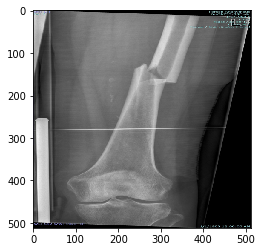

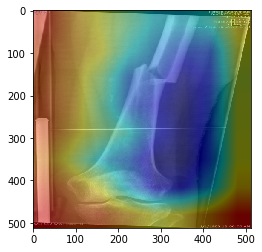

In [12]:
sample_dir = '/DL_course_data/Lab2/Bone/train/AFF/14.jpg'
img = imread(sample_dir)
Img = img[:,:,0]
img = img/255
img = resize(Img, (img_height, img_width), anti_aliasing = True).astype('float32')
img = np.expand_dims(img, axis = 2) 
img = np.expand_dims(img, axis = 0)
preds = clf.predict(img)
class_idx = np.argmax(preds[0])
print('the predicted class label is {}'.format(class_idx))
class_output = clf.output[:, class_idx]
last_conv_layer = clf.get_layer("Last_ConvLayer")

tf.compat.v1.disable_eager_execution()
grads = K.gradients(class_output, last_conv_layer.output)[0]
#grads = tf.GradientTape(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([clf.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([img])
for i in range(base*8):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
    
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)


img_ = cv2.imread(sample_dir)
img_ = cv2.resize(img_, (512, 512), interpolation = cv2.INTER_AREA)
#img = img/255
heatmap = cv2.resize(heatmap, (img_.shape[1], img_.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img_, 0.6, heatmap, 0.4, 0)
plt.figure()
plt.imshow(img_)
plt.figure()
plt.imshow(superimposed_img)